In [2]:
from matplotlib import pyplot as plt
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix 
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.models import model_from_json
from keras.utils import multi_gpu_model 
from keras.utils import to_categorical


Using TensorFlow backend.


Read the data
===========

In [47]:
x_original=pd.read_csv('../_xlable4_withNa_AllColumns.txt')
y_original=pd.read_csv('../_targelable4_withNa_AllColumns.txt')

# x_original=x_original[['Unnamed: 0','L100800', 'L104600', 'L103000', 'S000300', 'L103300', 'S000501', 'S000502', 'L101700', 'SEX', 
# 'L190400', 'L190500', 'AGE', 'L190300', 'L102900', 'L101300', 'L103100','FIELD_33', 'FIELD_38', 'L100700',
# 'FIELD_31', 'FIELD_21', 'FIELD_40', 'FIELD_27', 'FIELD_14', 'FIELD_41', 'FIELD_29', 'FIELD_20', 'FIELD_32']]

# y_original=y_original[['Unnamed: 0','L100800', 'L104600', 'L103000', 'S000300', 'L103300', 'S000501', 'S000502', 'L101700', 'SEX', 
# 'L190400', 'L190500', 'AGE', 'L190300', 'L102900', 'L101300', 'L103100','FIELD_33', 'FIELD_38', 'L100700',
# 'FIELD_31', 'FIELD_21', 'FIELD_40', 'FIELD_27', 'FIELD_14', 'FIELD_41', 'FIELD_29', 'FIELD_20', 'FIELD_32']]

# x_original=x_original[['Unnamed: 0','L100800','L104600','S000300','L103000','L103300','SEX','S000501','L101700','L190400',
# 'L190500','S000502','L190300','L101300','L103100','AGE','L100700','FIELD_33', 'FIELD_38', 'FIELD_40']]

# y_original=y_original[['Unnamed: 0','L100800','L104600','S000300','L103000','L103300','SEX','S000501','L101700','L190400',
# 'L190500','S000502','L190300','L101300','L103100','AGE','L100700','FIELD_33', 'FIELD_38', 'FIELD_40' ]]
                       
    
x_original=x_original[['Unnamed: 0','L100800', 'L104600', 'L103000', 'S000300', 'S000501', 'L103300', 'S000502', 'L101700', 
'SEX', 'AGE', 'L190400', 'L190500', 'L101300', 'L190300', 'L103100', 'L101600', 'L100700', 'L102900',
 'L504700', 'S010102', 'S010101',
# 'FIELD_7',
'FIELD_15', 'FIELD_22', 'FIELD_33',  'FIELD_24', 'FIELD_17', 'FIELD_38', 'FIELD_31',
 'FIELD_21', 'FIELD_27', 'FIELD_14', 'FIELD_40', 'FIELD_20', 'FIELD_41', 'FIELD_13', 'FIELD_29', 
 'FIELD_28', 'FIELD_32', 'FIELD_4', 'FIELD_42', 'FIELD_19'
                      ]]

y_original=y_original[['Unnamed: 0','L100800' ]]
        
    
                       
print(x_original.shape)
print(y_original.shape)


(159381, 42)
(159381, 2)


In [48]:
# x_original[x_original.FIELD_7==1]['SEX'].unique()

In [49]:
for index,col in enumerate(x_original.columns):
    print(col,x_original[col].dropna().shape[0])

Unnamed: 0 159381
L100800 159236
L104600 56437
L103000 158939
S000300 159075
S000501 159305
L103300 135222
S000502 159305
L101700 158951
SEX 159381
AGE 159381
L190400 159241
L190500 159204
L101300 159247
L190300 159204
L103100 158880
L101600 152251
L100700 152474
L102900 158941
L504700 135994
S010102 134555
S010101 134555
FIELD_15 159361
FIELD_22 159365
FIELD_33 159069
FIELD_24 158934
FIELD_17 159364
FIELD_38 159077
FIELD_31 159366
FIELD_21 159366
FIELD_27 159365
FIELD_14 159361
FIELD_40 159083
FIELD_20 159364
FIELD_41 159053
FIELD_13 159365
FIELD_29 159365
FIELD_28 159366
FIELD_32 158869
FIELD_4 156956
FIELD_42 159032
FIELD_19 159363


Prepare the data
============

In [50]:
# df=x_original.copy()
# conditions = [
#     (df.S000501 < 120)  ,
#     (df.S000501 >= 120) & (df.S000501 < 130),
#     (df.S000501 >=130)]
# choices = [0,1,2]
# df['sbpG'] = np.select(conditions, choices, default=0)
# df.head()
# x_original=df.copy()

# conditions2 = [
#     (df.S000502 < 80)  ,
#     (df.S000502 >= 80) & (df.S000502 < 90),
#     (df.S000502 >=90)]
# choices2 = [0,1,2]
# df['dbpG'] = np.select(conditions2, choices2, default=0)
# df.head()
# x_original=df.copy()

# conditions3 = [
#     (df.AGE < 30)  ,
#     (df.AGE >= 30) & (df.AGE < 40),
#     (df.AGE >= 40) & (df.AGE < 50),
#     (df.AGE >= 50) & (df.AGE < 60),
#     (df.AGE >= 60)]
# choices3 = [0,1,2,3,4]
# df['AgeG'] = np.select(conditions3, choices3, default=0)
# df.head()
# x_original=df.copy()


# conditions4 = [
#     (df.L100800 < 100)  ,
#     (df.L100800 >= 100) & (df.L100800 < 126), 
#     (df.L100800 >= 126)]
# choices4 = [0,1,2]
# df['CLASS'] = np.select(conditions4, choices4, default=0)
# df.head()
# x_original=df.copy()

In [90]:
data= pd.merge(x_original,y_original, how='inner',left_on='Unnamed: 0', right_on='Unnamed: 0')
data=data.dropna(). reset_index()

# data=data[data.AGE_x >= 40]
# data=data[data.AGE_x < 50]

# data=data[data.CLASS_x==0]
# data=data[data.sbpG==0]
# data=data[data.dbpG==0]

data=data[data.L100800_y <200]

data=data[data.FIELD_15==0]
data=data[data.FIELD_22==0]
data=data[data.SEX==0]
data=data[data.AGE < 40]

print(data.shape)

(8177, 44)


In [91]:
print(data.shape)
print(data.columns)
data.head()

(8177, 44)
Index(['index', 'Unnamed: 0', 'L100800_x', 'L104600', 'L103000', 'S000300',
       'S000501', 'L103300', 'S000502', 'L101700', 'SEX', 'AGE', 'L190400',
       'L190500', 'L101300', 'L190300', 'L103100', 'L101600', 'L100700',
       'L102900', 'L504700', 'S010102', 'S010101', 'FIELD_15', 'FIELD_22',
       'FIELD_33', 'FIELD_24', 'FIELD_17', 'FIELD_38', 'FIELD_31', 'FIELD_21',
       'FIELD_27', 'FIELD_14', 'FIELD_40', 'FIELD_20', 'FIELD_41', 'FIELD_13',
       'FIELD_29', 'FIELD_28', 'FIELD_32', 'FIELD_4', 'FIELD_42', 'FIELD_19',
       'L100800_y'],
      dtype='object')


,index,Unnamed: 0,L100800_x,L104600,L103000,S000300,S000501,L103300,S000502,L101700,...,FIELD_20,FIELD_41,FIELD_13,FIELD_29,FIELD_28,FIELD_32,FIELD_4,FIELD_42,FIELD_19,L100800_y
36,153,153,78.0,5.00,74.0,20.7,106.0,4.0,60.0,17.0,...,0.0,0.0,0.0,0.0,0.0,3.0,4.0,7.0,0.0,79.0
40,163,163,82.0,4.90,79.0,24.2,133.0,3.8,79.0,22.0,...,0.0,0.0,0.0,0.0,0.0,3.0,4.0,6.0,0.0,87.0
41,164,164,87.0,5.20,33.0,21.0,125.0,2.8,64.0,25.0,...,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,87.0
42,165,165,87.0,5.24,35.0,21.0,127.0,2.6,73.0,25.0,...,0.0,5.0,0.0,0.0,0.0,3.0,4.0,5.0,0.0,85.0
43,166,166,85.0,5.22,56.0,21.8,109.0,3.9,61.0,21.0,...,0.0,2.0,0.0,0.0,0.0,3.0,4.0,3.0,0.0,98.0


In [92]:
# x=data[['L100800_x', 'CLASS', 'L104600_x', 'L103000_x', 'S000300_x', 'L103300_x', 'S000501_x', 'S000502_x', 'L101700_x',
#         'SEX_x','L190400_x', 'L190500_x', 'AGE_x', 'L190300_x', 'L102900_x', 'L101300_x', 'L103100_x','FIELD_33_x',
#         'FIELD_38_x','FIELD_31_x', 'FIELD_21_x', 'FIELD_40_x', 'FIELD_27_x', 'FIELD_14_x', 'FIELD_41_x', 'FIELD_29_x',
#         'FIELD_20_x', 'FIELD_32_x','sbpG','dbpG','AgeG']]

# x=data[['L100800_x','L104600_x','S000300_x','L103000_x','L103300_x','SEX_x','S000501_x','L101700_x','L190400_x',
#         'L190500_x','S000502_x','L190300_x','L101300_x','L103100_x','AGE_x','L100700_x','FIELD_33_x', 'FIELD_38_x', 'FIELD_40_x' ]]

# y=data[['L100800_y']]

# y=data[['L100800_y', 'L104600_y', 'L103000_y', 'S000300_y', 'L103300_y', 'S000501_y', 'S000502_y', 'L101700_y',
#         'SEX_y','L190400_y', 'L190500_y', 'AGE_y', 'L190300_y', 'L102900_y', 'L101300_y', 'L103100_y','FIELD_33_y',
#         'FIELD_38_y','FIELD_31_y', 'FIELD_21_y', 'FIELD_40_y', 'FIELD_27_y', 'FIELD_14_y', 'FIELD_41_y', 'FIELD_29_y',
#         'FIELD_20_y', 'FIELD_32_y']]


x=data[['L100800_x', 'L104600', 'L103000', 'S000300',
       'S000501', 'L103300', 'S000502', 'L101700', 'SEX', 'AGE', 'L190400',
       'L190500', 'L101300', 'L190300', 'L103100', 'L101600', 'L100700',
       'L102900', 'L504700', 'S010102', 'S010101', 'FIELD_15', 'FIELD_22',
       'FIELD_33', 'FIELD_24', 'FIELD_17', 'FIELD_38', 'FIELD_31', 'FIELD_21',
       'FIELD_27', 'FIELD_14', 'FIELD_40', 'FIELD_20', 'FIELD_41', 'FIELD_13',
       'FIELD_29', 'FIELD_28', 'FIELD_32', 'FIELD_4', 'FIELD_42', 'FIELD_19']]

y=data[['L100800_y']]


In [107]:
# for index,col in enumerate(x.columns):
#     print(col,x[col].dropna().shape[0])

Check the correlation of the selected feature with the independent variables
=====

In [94]:
temppd=pd.DataFrame(x.copy())
temppd['y']=y.L100800_y
temppd.head()
corval=abs(temppd.corr()).sort_values(by='y', ascending=False)

In [95]:
corval.y

y            1.000000
L100800_x    0.482694
L104600      0.379110
S000300      0.235398
L103000      0.225946
L101700      0.215518
L103300      0.184745
AGE          0.152039
L102900      0.151789
S000501      0.150921
S000502      0.132675
L101300      0.123368
L100700      0.115870
L103100      0.096199
FIELD_38     0.090182
FIELD_33     0.082186
FIELD_31     0.069848
S010101      0.067641
S010102      0.062805
L190400      0.058996
L504700      0.044438
L190500      0.041684
L101600      0.040608
L190300      0.036786
FIELD_14     0.021786
FIELD_42     0.019390
FIELD_19     0.018480
FIELD_29     0.017527
FIELD_20     0.012782
FIELD_32     0.011929
FIELD_40     0.009394
FIELD_21     0.007589
FIELD_13     0.004775
FIELD_4      0.004222
FIELD_28     0.002600
FIELD_41     0.000836
FIELD_27     0.000510
SEX               NaN
FIELD_15          NaN
FIELD_22          NaN
FIELD_24          NaN
FIELD_17          NaN
Name: y, dtype: float64

In [121]:
x=data[['L100800_x', 'L104600', 'L103000', 'S000300',
       'S000501', 'L103300', 'S000502', 'L101700', 'SEX', 'AGE', 
       'L101300', 'L103100', 'L100700',
       'L102900']]

In [122]:
#histogram plot of the features
# import matplotlib.pyplot as plt
# x[x.dtypes[(x.dtypes=="float64")|(x.dtypes=="int64")]
#                         .index.values].hist(figsize=[11,11])

Apply PCA
===========

In [123]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=8)
# pca.fit(x)

# print(pca.explained_variance_ratio_)   
# print(np.sum(pca.explained_variance_ratio_))

# x=pca.fit_transform(x) 
# print(x.shape)


feature scaling
=======

In [124]:
# from sklearn import preprocessing
# min_max_scaler = preprocessing.MinMaxScaler()  #StandardScaler()
# x = min_max_scaler.fit_transform(x)

clustring test
==========

In [125]:
# from sklearn.cluster import KMeans
# from scipy.spatial.distance import cdist

# K = range(1,10)
# distortions = []

# for k in K:
#     kmeanModel = KMeans(n_clusters=k).fit(x)
#     kmeanModel.fit(x)
#     distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])

# # Plot the elbow
# plt.plot(K, distortions, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Distortion')
# plt.title('The Elbow Method showing the optimal k')
# plt.show()


In [126]:
# kmeanModel = KMeans(n_clusters=k).fit(x)
# x['lbl']=kmeanModel.labels_ 

In [127]:
# x.columns

In [128]:
x.shape

(8177, 14)

Random Forest Regressor
=============

In [129]:
ylable=y[['L100800_y']]  
xtrain,xtest,ytrain,ytest=train_test_split(x, ylable, random_state=42, test_size=0.2)

In [130]:
regr = RandomForestRegressor(max_depth=7, random_state=0,verbose =0,n_estimators=500)
regr.fit(xtrain, ytrain) 
print(regr.feature_importances_)
ypred=regr.predict(xtest)


[0.4840109  0.22231651 0.03864871 0.04520061 0.02268908 0.02176195
 0.01468941 0.04521117 0.         0.01777544 0.0259403  0.01820712
 0.01995283 0.02359596]


In [131]:
xtrain.columns

Index(['L100800_x', 'L104600', 'L103000', 'S000300', 'S000501', 'L103300',
       'S000502', 'L101700', 'SEX', 'AGE', 'L101300', 'L103100', 'L100700',
       'L102900'],
      dtype='object')

mean_squared_error 60.42050248692069
root mean_squared_error 7.773062619516241
mean_absolute_error 5.8084510516482855
r2_score 0.29313934038579226


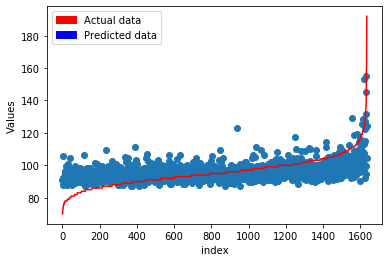

,t + 1,pred (t +1)
1398,128.0,122.165495
447,129.0,92.375810
1440,130.0,127.279714
1599,132.0,99.419991
949,133.0,155.280331
483,135.0,131.529104
1558,139.0,94.809932
1165,159.0,145.271654
1092,163.0,104.254890
841,192.0,124.031579


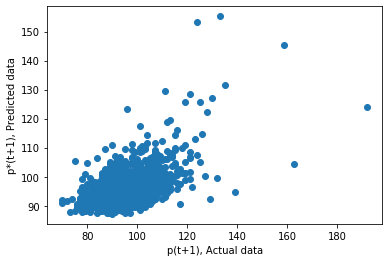

In [132]:

import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
ypredPD['t + 1']=ytest.values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(30)

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

ypredPD.tail(10)

In [133]:
# tempdata=pd.DataFrame(xtest.copy())
# tempdata['ytest']=ytest
# # temp=temp.dropna()
# # tempdata.head()
# # tempdata[tempdata.ytest.isna()].index

# tempdata=tempdata.drop(tempdata[tempdata.ytest.isna()].index)


xg boost
==========

In [134]:
import xgboost as xgb
# from sklearn.metrics import mean_squared_error
# import pandas as pd
# import numpy as np

In [135]:
xg_reg = xgb.XGBRegressor()
# xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, 
#                           learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(xtrain, ytrain) 

[22:54:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [136]:

ypred = xg_reg.predict(xtest)

import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

# ypredPD=pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
# ypredPD['t + 1']=ytest.values
# ypredPD['pred (t +1)']=ypred
# ypredPD.head(10)

mean_squared_error 60.40124790833945
root mean_squared_error 7.771823975640432
mean_absolute_error 5.801833355630814
r2_score 0.29336460008335064


In [56]:
# ytest[ytest.isna()].shape
# tempdata.iloc[:,-1]

ANN
==========

In [58]:
model= Sequential()
model.add(Dense(input_dim=19,units=128,activation='relu', kernel_initializer='uniform'))
model.add(Dense(units=128, activation='relu', kernel_initializer='uniform')) 
model.add(BatchNormalization())
model.add(Dropout(0.25))  
model.add(Dense(units=64, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units=32, activation='relu', kernel_initializer='uniform')) 
model.add(BatchNormalization())
model.add(Dropout(0.25))  
model.add(Dense(units=16, activation='relu', kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.25))  
model.add(Dense(units=8, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units=1, kernel_initializer='uniform'))
model.compile(loss='mean_squared_error', optimizer='Nadam', metrics=['mean_squared_error' ])

In [59]:
h=model.fit(xtrain, ytrain, validation_split=.2,epochs=100, batch_size=50)

W1004 01:30:06.831277   164 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 24937 samples, validate on 6235 samples
Epoch 1/100
24937/24937 [==============================] - 2s 70us/step - loss: 3466.0611 - mean_squared_error: 3466.0611 - val_loss: 223.7124 - val_mean_squared_error: 223.7124
Epoch 2/100
24937/24937 [==============================] - 1s 31us/step - loss: 408.2913 - mean_squared_error: 408.2913 - val_loss: 262.0882 - val_mean_squared_error: 262.0882
Epoch 3/100
24937/24937 [==============================] - 1s 32us/step - loss: 329.2152 - mean_squared_error: 329.2152 - val_loss: 2545.9635 - val_mean_squared_error: 2545.9635
Epoch 4/100
24937/24937 [==============================] - 1s 32us/step - loss: 286.4956 - mean_squared_error: 286.4956 - val_loss: 3514.3411 - val_mean_squared_error: 3514.3411
Epoch 5/100
24937/24937 [==============================] - 1s 31us/step - loss: 268.6574 - mean_squared_error: 268.6574 - val_loss: 131.6172 - val_mean_squared_error: 131.6172
Epoch 6/100
24937/24937 [==============================] - 1s 32u

24937/24937 [==============================] - 1s 32us/step - loss: 70.4709 - mean_squared_error: 70.4709 - val_loss: 97.8517 - val_mean_squared_error: 97.8517
Epoch 95/100
24937/24937 [==============================] - 1s 31us/step - loss: 70.3885 - mean_squared_error: 70.3885 - val_loss: 78.2340 - val_mean_squared_error: 78.2340
Epoch 96/100
24937/24937 [==============================] - 1s 31us/step - loss: 70.3243 - mean_squared_error: 70.3243 - val_loss: 65.7738 - val_mean_squared_error: 65.7738
Epoch 97/100
24937/24937 [==============================] - 1s 31us/step - loss: 69.9672 - mean_squared_error: 69.9672 - val_loss: 71.9764 - val_mean_squared_error: 71.9764
Epoch 98/100
24937/24937 [==============================] - 1s 31us/step - loss: 70.7425 - mean_squared_error: 70.7425 - val_loss: 71.9981 - val_mean_squared_error: 71.9981
Epoch 99/100
24937/24937 [==============================] - 1s 31us/step - loss: 70.9729 - mean_squared_error: 70.9729 - val_loss: 79.1552 - val_mea

In [60]:
ypred=model.predict(xtest)

import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
ypredPD['t + 1']=ytest.values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(10)

mean_squared_error 73.95340234275717
root mean_squared_error 8.599616406721708
mean_absolute_error 6.329188529569806
r2_score 0.3786107746497982


,t + 1,pred (t +1)
0,89.0,92.097168
1,106.0,97.246140
2,94.0,94.313225
3,97.0,91.301956
4,95.0,90.068474
5,99.0,92.388924
6,92.0,94.721748
7,93.0,93.327438
8,100.0,93.935234
9,102.0,95.853935


dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])


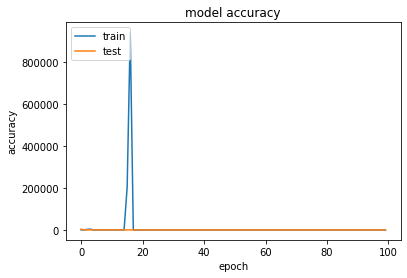

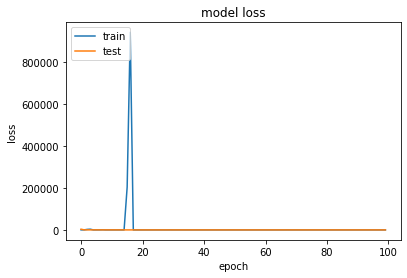

In [61]:
history=h
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['val_mean_squared_error'])
plt.plot(history.history['mean_squared_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [62]:
ypredPD['diff']=abs(ypredPD['t + 1']- ypredPD['pred (t +1)'])
print(np.mean(ypredPD['diff']))
print(np.std(ypredPD['diff']))
print(100*ypredPD[ypredPD['diff']<=5].shape[0]/ypredPD.shape[0])

6.329188529569806
5.821921924924723
50.981650198896446


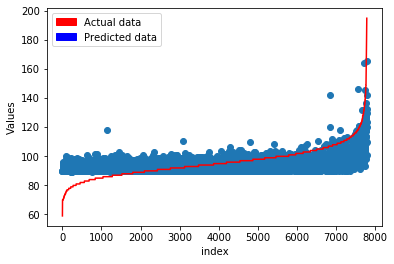

,t + 1,pred (t +1),diff
7409,59.0,90.086021,31.086021
1099,70.0,90.065338,20.065338
1135,70.0,90.083504,20.083504
7325,70.0,90.090096,20.090096
1923,70.0,90.064430,20.064430
6150,70.0,90.078682,20.078682
6940,70.0,89.735100,19.735100
7198,70.0,90.075302,20.075302
6727,70.0,90.069450,20.069450
5082,70.0,90.095238,20.095238


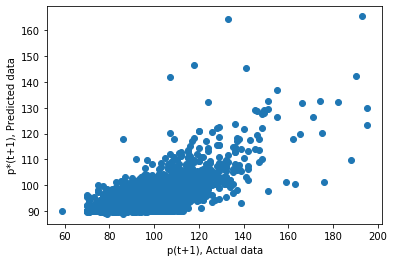

In [63]:

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

ypredPD.head(10)

SVR
======

In [ ]:
from sklearn.svm import SVR
# svr_rbf = SVR(kernel='rbf', C=10, gamma=0.02, epsilon=.001)
svr_rbf = SVR(kernel='rbf')

In [ ]:
svr_rbf.fit(xtrain, ytrain) 

In [ ]:
ypred=svr_rbf.predict(xtest)

In [ ]:
import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
ypredPD['t + 1']=ytest.values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(10)